# Word2Vec 소개

1안) 자신의 문장으로 단어별 벡터를 생성한다.

In [1]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 단어와 2차원 X축의 값, Y축의 값을 입력받아 2차원 그래프를 그림
def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(8, 6))
    plt.scatter(xs, ys, marker='o')
    for i, v in enumerate(vocabs):
        plt.annotate(v, xy=(xs[i], ys[i]))

In [4]:
sentences = [
              ['this', 'is', 'a', 'good', 'product'],
              ['it', 'is', 'a', 'excellent', 'product'],
              ['it', 'is', 'a', 'bad', 'product'],
              ['that', 'is', 'the', 'worst', 'product']
            ]

In [5]:
# 문장을 이용하여 단어와 벡터를 생성
model = Word2Vec(sentences, size=300, window=3, min_count=1, workers=1)

In [6]:
# 단어 백터 구하기
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [7]:
vocabs

dict_keys(['this', 'is', 'a', 'good', 'product', 'it', 'excellent', 'bad', 'that', 'the', 'worst'])

In [8]:
word_vectors_list

[array([-4.33751498e-04,  1.96213019e-04, -1.16578478e-03, -6.77112315e-04,
         1.72035085e-04,  2.33499595e-04,  7.28398270e-04, -1.19171571e-03,
        -1.31661666e-03,  1.50985410e-03, -9.65933374e-04,  4.66716272e-04,
        -5.25413314e-04, -8.20090412e-04,  1.55291613e-03, -3.79573758e-05,
         9.74409922e-04,  3.59555444e-04,  5.27631855e-05,  1.46077632e-03,
         7.22317127e-05,  1.01281190e-03,  1.27036634e-04,  1.35200069e-04,
         6.27288711e-04,  2.74008980e-05,  8.49213335e-04, -2.60142609e-04,
        -1.46219588e-03, -3.52723408e-04,  1.22665137e-03,  1.33922475e-03,
         3.58756719e-04,  1.84342607e-05, -3.67822242e-04,  1.44631451e-03,
         8.32748716e-04,  1.42900331e-03, -6.65112340e-04, -7.44778197e-04,
         7.35311944e-04, -8.56477709e-05,  1.64681755e-03,  1.38622639e-03,
         5.86340262e-04,  7.18153839e-04, -1.00481102e-05,  1.24508761e-05,
         6.59257290e-04,  6.72978174e-04,  8.64848727e-04,  7.47906277e-04,
         3.9

In [9]:
# 단어간 유사도 확인
word_vectors.similarity(w1='it', w2='this')

-0.08537699

In [10]:
# 그래프 그리기
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:, 0]
ys = xys[:, 1]

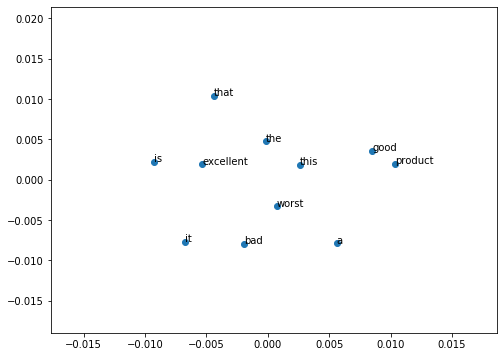

In [11]:
plot_2d_graph(vocabs, xs, ys)

3안) 자신 단어별 벡터와 미리 트레이닝 모델의 벡터를 교차하여 이용한다.
(보유한 단어사전은 바뀌지 않고 벡터와 교차하여 업데이트된다.)

In [15]:
# 다운로드(https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&export=download)
filename = 'data/GoogleNews-vectors-negative300.bin'
model.intersect_word2vec_format(fname=filename, binary=True)

In [16]:
# 단어 벡터 구하기
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [17]:
len(word_vectors_list)

11

In [18]:
# 단어간 유사도 확인
word_vectors.similarity(w1='it', w2='this')

0.5386158

In [19]:
# 그래프 그리기
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:, 0]
ys = xys[:, 1]

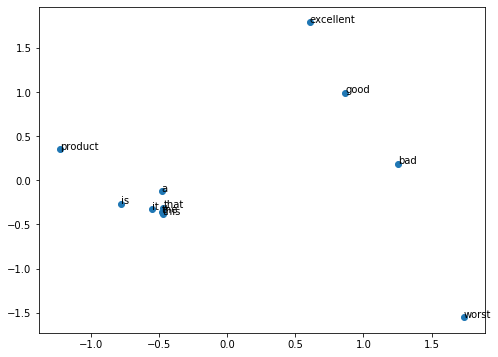

In [20]:
plot_2d_graph(vocabs, xs, ys)

In [23]:
#모델 저장
model.save('model/01_word2vec.model')
#로드
#model = Word2Vec.load('model/01_word2vec.model')